In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, I'll bring in the raw data file so that I can see what I'm working with. I'll assign it to variable df so that it can more easily managed.

In [2]:
df = pd.read_csv('assets/Louisville_Metro_KY_-_Crime_Data_2021.csv', low_memory=False)

In [54]:
# df.info()

I'll use the .columns suffix to retrieve my column headers. From there I'll determine which headers can dropped and assign them to a variable to easily refer to them later without having to type them out again.

In [55]:
# df.columns
dropped_columns = ['INCIDENT_NUMBER', 'BADGE_ID', 'NIBRS_CODE', 'UCR_HIERARCHY', 'ATT_COMP', 'ObjectId', 'LMPD_BEAT', 'BLOCK_ADDRESS', 'City', 'DATE_REPORTED']

For the purposes of my analysis, I'm going to discard any columns that have no discernible effect on the data to be analyzed. To avoid overriting the original data set, I'm going to create a new variable, ndf, to hold the data frame without the useless columns.

In [44]:
ndf = df.drop(columns= dropped_columns)

Here, I'm calling the .head function again in order to make sure that the previous function call executed correctly.

In [45]:
ndf.head()

,DATE_OCCURED,CRIME_TYPE,UOR_DESC,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2020/12/31 20:00:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,6TH DIVISION,RESIDENCE / HOME,40218.0
1,2020/12/31 20:00:00,BURGLARY,BURGLARY - 2ND DEGREE,6TH DIVISION,RESIDENCE / HOME,40218.0
2,2021/01/01 00:03:00,ASSAULT,ASSAULT - 1ST DEGREE,1ST DIVISION,HIGHWAY / ROAD / ALLEY,40203.0
3,2021/01/01 00:13:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,3RD DIVISION,RESIDENCE / HOME,40214.0
4,2020/12/31 23:03:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,4TH DIVISION,DEPARTMENT / DISCOUNT STORE,40215.0


Next, I'm going to utilize the info function to see the Dtypes of all of my data columns. 

In [46]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72123 entries, 0 to 72122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_OCCURED   72123 non-null  object 
 1   CRIME_TYPE     72123 non-null  object 
 2   UOR_DESC       72123 non-null  object 
 3   LMPD_DIVISION  72123 non-null  object 
 4   PREMISE_TYPE   72114 non-null  object 
 5   ZIP_CODE       72098 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.3+ MB


In [56]:
# ndf['ZIP_CODE'] = ndf['ZIP_CODE'].fillna(0)
ndf['ZIP_CODE'] = ndf['ZIP_CODE'].dropna(0)
ndf['ZIP_CODE'] = ndf['ZIP_CODE'].astype(int)

/var/folders/nt/33j272z93nq7qmv7sqkq4x8m0000gn/T/ipykernel_36984/2678890879.py:2: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only.
  ndf['ZIP_CODE'] = ndf['ZIP_CODE'].dropna(0)


<!-- **I can see that most of the columns are currently typed as objects. However, I know from earlier that some of these columns have a more appropriate type that can be associated with them. First, I'll attempt to re-type the 'ZIP_CODE' as an integer because zip codes don't make sense as floats.** -->

In [61]:
ndf['ZIP_CODE'].sort_index()


0        40218
1        40218
2        40203
3        40214
4        40215
         ...  
72118    40218
72119    40211
72120    40218
72121    40202
72122    40218
Name: ZIP_CODE, Length: 72098, dtype: int64

In [52]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72098 entries, 0 to 72122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE_OCCURED   72098 non-null  object
 1   CRIME_TYPE     72098 non-null  object
 2   UOR_DESC       72098 non-null  object
 3   LMPD_DIVISION  72098 non-null  object
 4   PREMISE_TYPE   72089 non-null  object
 5   ZIP_CODE       72098 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.9+ MB


<!-- **We've got an error here stating the column can't be converted due to an IntCastingNaNError. To fix this, I'll fill all of the NA values in as 0.** -->

In [13]:
ndf.head()

,DATE_OCCURED,CRIME_TYPE,UOR_DESC,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2020/12/31 20:00:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,6TH DIVISION,RESIDENCE / HOME,40218
1,2020/12/31 20:00:00,BURGLARY,BURGLARY - 2ND DEGREE,6TH DIVISION,RESIDENCE / HOME,40218
2,2021/01/01 00:03:00,ASSAULT,ASSAULT - 1ST DEGREE,1ST DIVISION,HIGHWAY / ROAD / ALLEY,40203
3,2021/01/01 00:13:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,3RD DIVISION,RESIDENCE / HOME,40214
4,2020/12/31 23:03:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,4TH DIVISION,DEPARTMENT / DISCOUNT STORE,40215


In [14]:

# ndf['ZIP_CODE'] = ndf['ZIP_CODE'].fillna(0)

Now, let's attempt to convert this column to int again.

In [15]:

ndf['ZIP_CODE'] = ndf['ZIP_CODE'].astype(str)

The notebook is not giving an error now, but let's check to be sure. By running the info function, we can see that our conversion successfully executed. Additionally, by running the head function again I can see that the 'ZIP_CODE' column has dropped the decimal points from the the zip codes.

In [16]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72123 entries, 0 to 72122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE_OCCURED   72123 non-null  object
 1   CRIME_TYPE     72123 non-null  object
 2   UOR_DESC       72123 non-null  object
 3   LMPD_DIVISION  72123 non-null  object
 4   PREMISE_TYPE   72114 non-null  object
 5   ZIP_CODE       72123 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB


In [17]:
# Attempt to get rid of decimals from zip code column
# ndf['ZIP_CODE'] = ndf['ZIP_CODE'].str.replace(".0", "")

In [18]:
# DROP NON-2021 DATES
clean_years_df = ndf.drop(ndf[ndf.DATE_OCCURED < '2021-'].index)

In [19]:
clean_years_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70685 entries, 2 to 72122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DATE_OCCURED   70685 non-null  object
 1   CRIME_TYPE     70685 non-null  object
 2   UOR_DESC       70685 non-null  object
 3   LMPD_DIVISION  70685 non-null  object
 4   PREMISE_TYPE   70676 non-null  object
 5   ZIP_CODE       70685 non-null  object
dtypes: object(6)
memory usage: 3.8+ MB


In [20]:
#Sort by time to get chronological order.
#Sort by zip code to to determine zero values.
clean_years_df.sort_values(['ZIP_CODE','DATE_OCCURED'], inplace= True)
clean_years_df

,DATE_OCCURED,CRIME_TYPE,UOR_DESC,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
551,2021/01/03 14:43:00,ARSON,ARSON - 1ST DEGREE,8TH DIVISION,HIGHWAY / ROAD / ALLEY,0
554,2021/01/03 14:43:00,OTHER,RECOVERY OF STOLEN VEHICLE-OUT OF JURISDICTION,8TH DIVISION,HIGHWAY / ROAD / ALLEY,0
6069,2021/01/10 16:11:00,FRAUD,CRIMINAL POSSESSION OF FORGED INSTRUMENT-3RD D...,7TH DIVISION,HIGHWAY / ROAD / ALLEY,0
6122,2021/01/10 22:17:00,DRUGS/ALCOHOL VIOLATIONS,DRUG PARAPHERNALIA - BUY/POSSESS,5TH DIVISION,HIGHWAY / ROAD / ALLEY,0
2762,2021/01/13 02:23:00,DRUGS/ALCOHOL VIOLATIONS,DRUG PARAPHERNALIA - BUY/POSSESS,1ST DIVISION,HIGHWAY / ROAD / ALLEY,0
...,...,...,...,...,...,...
71867,2021/12/31 10:20:00,VEHICLE BREAK-IN/THEFT,"TBUT OR DISP CONTENTS FROM VEH $500 < $1,000",8TH DIVISION,PARKING LOT / GARAGE,40299
19281,2021/04/10 09:30:00,OTHER,MISSING PERSONS,2ND DIVISION,RESIDENCE / HOME,40402
51396,2021/09/15 20:45:00,OTHER,MISSING PERSONS,8TH DIVISION,HOTEL / MOTEL / ETC.,40403
15321,2021/03/22 11:00:00,FRAUD,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT,METRO LOUISVILLE,RESIDENCE / HOME,47129


I need to figure out how to group occurrences by month for easier visualizations in the future. Perhaps creating a function would help?

for month in months:
    

Let's do some more conversions. The time-related columns should obviously be listed per the data type they are conveying. By using pandas built in tools, I can convert those columns to datetime64 Dtypes. As above, I'm calling the info and head functions to check my work.

In [21]:
# ndf['DATE_REPORTED'] = pd.to_datetime(ndf['DATE_REPORTED'])
ndf['DATE_OCCURED'] = pd.to_datetime(ndf['DATE_OCCURED'])
ndf.info()
ndf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72123 entries, 0 to 72122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE_OCCURED   72123 non-null  datetime64[ns]
 1   CRIME_TYPE     72123 non-null  object        
 2   UOR_DESC       72123 non-null  object        
 3   LMPD_DIVISION  72123 non-null  object        
 4   PREMISE_TYPE   72114 non-null  object        
 5   ZIP_CODE       72123 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 3.3+ MB


,DATE_OCCURED,CRIME_TYPE,UOR_DESC,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2020-12-31 20:00:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,6TH DIVISION,RESIDENCE / HOME,40218
1,2020-12-31 20:00:00,BURGLARY,BURGLARY - 2ND DEGREE,6TH DIVISION,RESIDENCE / HOME,40218
2,2021-01-01 00:03:00,ASSAULT,ASSAULT - 1ST DEGREE,1ST DIVISION,HIGHWAY / ROAD / ALLEY,40203
3,2021-01-01 00:13:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,3RD DIVISION,RESIDENCE / HOME,40214
4,2020-12-31 23:03:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,4TH DIVISION,DEPARTMENT / DISCOUNT STORE,40215


In [ ]:
ndf['DATE_OCCURED'].drop(year= 'DATE_OCCURED')

Now, the data frame looks a lot better. I'm going to go ahead and save it to a new csv file.

In [22]:
# ndf.to_csv('Clean_Louisville_Metro_KY_-_Crime_Data_2021.csv')

Use .groupby to sort data into manageable.

For Loop to drop non-2021 dates?
For Loop to group dates into months?

In [23]:
# dates = ndf['DATE_OCCURED']
# for date in dates:



In [24]:
# ndf.groupby(['DATE_OCCURED'].dt.month).sum()
# dg = ndf.groupby(pd.Grouper(key='DATE_OCCURED', freq='1M')).sum()

In [25]:
# dg

In [26]:
ndf.groupby(['DATE_OCCURED'])[['CRIME_TYPE']].count()

,CRIME_TYPE
DATE_OCCURED,
1963-01-01 00:01:00,1
1975-12-23 04:00:00,1
1987-01-01 22:14:00,1
1996-01-01 12:00:00,1
1997-01-01 00:00:00,1
...,...
2021-12-31 23:04:00,2
2021-12-31 23:05:00,1
2021-12-31 23:08:00,1


In [27]:
ndf

,DATE_OCCURED,CRIME_TYPE,UOR_DESC,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,2020-12-31 20:00:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,6TH DIVISION,RESIDENCE / HOME,40218
1,2020-12-31 20:00:00,BURGLARY,BURGLARY - 2ND DEGREE,6TH DIVISION,RESIDENCE / HOME,40218
2,2021-01-01 00:03:00,ASSAULT,ASSAULT - 1ST DEGREE,1ST DIVISION,HIGHWAY / ROAD / ALLEY,40203
3,2021-01-01 00:13:00,ASSAULT,WANTON ENDANGERMENT-1ST DEGREE,3RD DIVISION,RESIDENCE / HOME,40214
4,2020-12-31 23:03:00,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,4TH DIVISION,DEPARTMENT / DISCOUNT STORE,40215
...,...,...,...,...,...,...
72118,2021-12-07 22:35:00,ARSON,ARSON - 2ND DEGREE,6TH DIVISION,HIGHWAY / ROAD / ALLEY,40218
72119,2021-11-25 02:36:00,ASSAULT,ASSAULT - 1ST DEGREE,2ND DIVISION,RESIDENCE / HOME,40211
72120,2017-08-23 15:00:00,SEX CRIMES,SEXUAL ABUSE - 1ST DEGREE- VICTIM U/12 YOA,6TH DIVISION,RESIDENCE / HOME,40218
72121,2021-06-18 03:43:00,ASSAULT,MENACING,1ST DIVISION,JAIL / PENITENTARY,40202


In [39]:
# ndf.groupby(ndf['DATE_OCCURED'])
ndf.groupby([ndf.DATE_OCCURED.dt.to_period('M'), 'CRIME_TYPE']).sum().reset_index()

/var/folders/nt/33j272z93nq7qmv7sqkq4x8m0000gn/T/ipykernel_36984/3467578866.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  ndf.groupby([ndf.DATE_OCCURED.dt.to_period('M'), 'CRIME_TYPE']).sum().reset_index()


,DATE_OCCURED,CRIME_TYPE,UOR_DESC,LMPD_DIVISION,PREMISE_TYPE,ZIP_CODE
0,1963-01,OTHER,MISSING PERSONS,METRO LOUISVILLE,RESIDENCE / HOME,40056
1,1975-12,BURGLARY,BURGLARY - 2ND DEGREE,1ST DIVISION,OTHER RESIDENCE (APARTMENT/CONDO),40212
2,1987-01,SEX CRIMES,SODOMY - 1ST DEGREE,7TH DIVISION,RESIDENCE / HOME,40023
3,1996-01,FRAUD,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT,4TH DIVISION,CYBERSPACE,40203
4,1997-01,SEX CRIMES,SEXUAL ABUSE - 1ST DEGREE- VICTIM U/12 YOA,3RD DIVISION,RESIDENCE / HOME,40272
...,...,...,...,...,...,...
473,2021-12,SEX CRIMES,SEXUAL ABUSE - 3RD DEGREEVOYEURISMRAPE - 1ST D...,1ST DIVISION4TH DIVISION4TH DIVISION4TH DIVISI...,DRUG STORE/DR`S OFFICE/HOSPITAL R...,4020240208402044021540214402124020340203402024...
474,2021-12,THEFT/LARCENY,"TBUT OR DISP FROM BUILDING $1,000 < $10,000TBU...",4TH DIVISION3RD DIVISION3RD DIVISION2ND DIVISI...,HOTEL / MOTEL / ETC. B...,4020940216402144021140203402024021140214402154...
475,2021-12,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREECRIMINAL MISCHIEF-...,1ST DIVISION4TH DIVISION3RD DIVISION1ST DIVISI...,RESIDENCE / HOME H...,4020240209402164020240215402194021340216402914...
476,2021-12,VEHICLE BREAK-IN/THEFT,"TBUT OR DISP CONTENTS FROM VEH $500 < $1,000TB...",1ST DIVISION7TH DIVISION1ST DIVISION3RD DIVISI...,PARKING LOT / GARAGE P...,4020240219402034025840206402154021940272402724...


<AxesSubplot:ylabel='CRIME_TYPE,ZIP_CODE'>

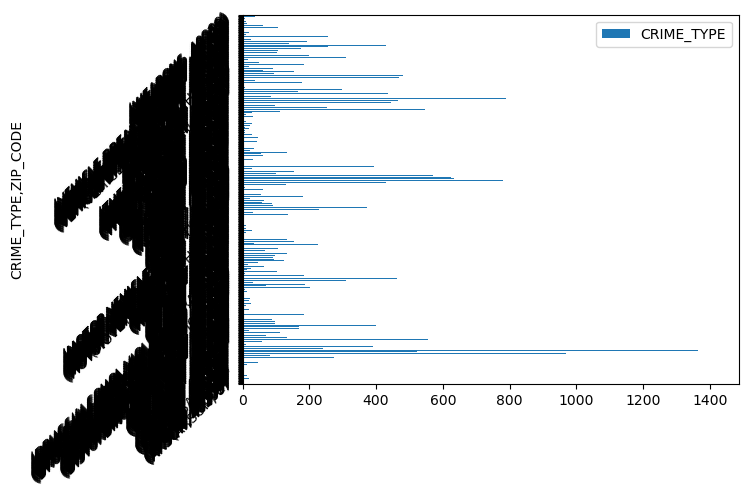

In [28]:
ndf.groupby(['CRIME_TYPE', 'ZIP_CODE'])[['CRIME_TYPE']].count().plot.barh(rot= 45)

<AxesSubplot:ylabel='CRIME_TYPE'>

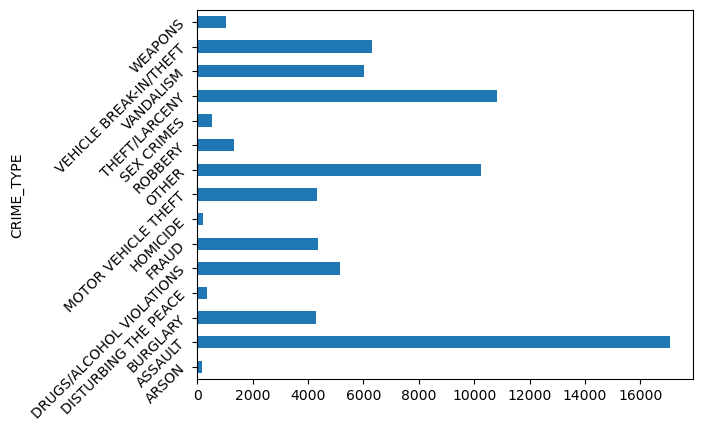

In [29]:
# crime_type_by_zip = ndf.groupby(['CRIME_TYPE', 'ZIP_CODE'])[['CRIME_TYPE']].count()
ndf.groupby(['CRIME_TYPE'])['CRIME_TYPE'].count().plot.barh(rot= 45)
# crime_type_by_zip

In [30]:
ndf.groupby(['CRIME_TYPE'])['CRIME_TYPE'].count()

CRIME_TYPE
ARSON                         180
ASSAULT                     17069
BURGLARY                     4274
DISTURBING THE PEACE          337
DRUGS/ALCOHOL VIOLATIONS     5142
FRAUD                        4342
HOMICIDE                      196
MOTOR VEHICLE THEFT          4336
OTHER                       10230
ROBBERY                      1312
SEX CRIMES                    545
THEFT/LARCENY               10828
VANDALISM                    6021
VEHICLE BREAK-IN/THEFT       6294
WEAPONS                      1017
Name: CRIME_TYPE, dtype: int64

In [31]:
ndf.CRIME_TYPE.value_counts()

ASSAULT                     17069
THEFT/LARCENY               10828
OTHER                       10230
VEHICLE BREAK-IN/THEFT       6294
VANDALISM                    6021
DRUGS/ALCOHOL VIOLATIONS     5142
FRAUD                        4342
MOTOR VEHICLE THEFT          4336
BURGLARY                     4274
ROBBERY                      1312
WEAPONS                      1017
SEX CRIMES                    545
DISTURBING THE PEACE          337
HOMICIDE                      196
ARSON                         180
Name: CRIME_TYPE, dtype: int64

With our newly cleaned data, let's start deriving some initial insights from it. Let's simple and...

/Users/jeffreyfennell/opt/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


TypeError: unhashable type: 'numpy.ndarray'

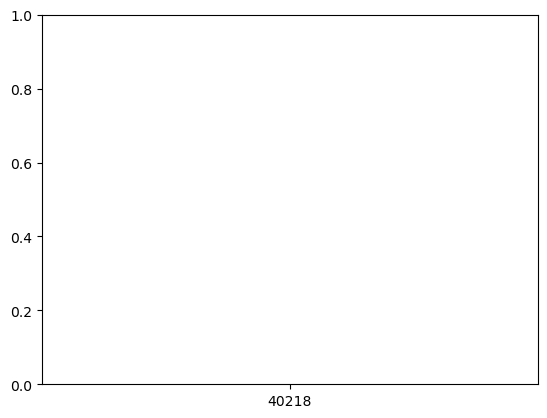

In [36]:
# ndf.groupby(['ZIP_CODE'])['CRIME_TYPE'].count().plot.bar(xlabel = 'ZIP', rot=45)
# plt.plot(['ZIP_CODE'],[['CRIME_TYPE'].count()])
fig, ax = plt.subplots()
ax.plot(ndf['ZIP_CODE'], ndf.groupby(['CRIME_TYPE']))
plt.show()

In [ ]:
ndf.groupby(['CRIME_TYPE']), ndf.groupby(['CRIME_TYPE', 'ZIP_CODE'])['CRIME_TYPE'].count()
# plt.show()
# ndf.plot(kind = 'bar', x = 'ZIP_CODE', y = [len("CRIME_TYPE")])
